In [93]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

In [97]:
sql_engine = mysql.connector.connect(
    host="giniewicz.it",
    port="3306",
    user="team12",
    password="te@mizP@ss",
    database="team12")

# Analiza dotychczasowej działalności kliniki weterynaryjnej

## 1. Liczba wizyt każdego dnia.

In [3]:
mycursor = sql_engine.cursor()
query = "SELECT date(data_wizyty) AS dzien_wizyty,count(*) as liczba_wizyt FROM `team12`.`wizyty` GROUP BY dzien_wizyty LIMIT 1000;"
mycursor.execute(query)

In [4]:
myresult = mycursor.fetchall()
daty = []
wizyty = []
for x in myresult:
    daty.append(x[0])
    wizyty.append(x[1])

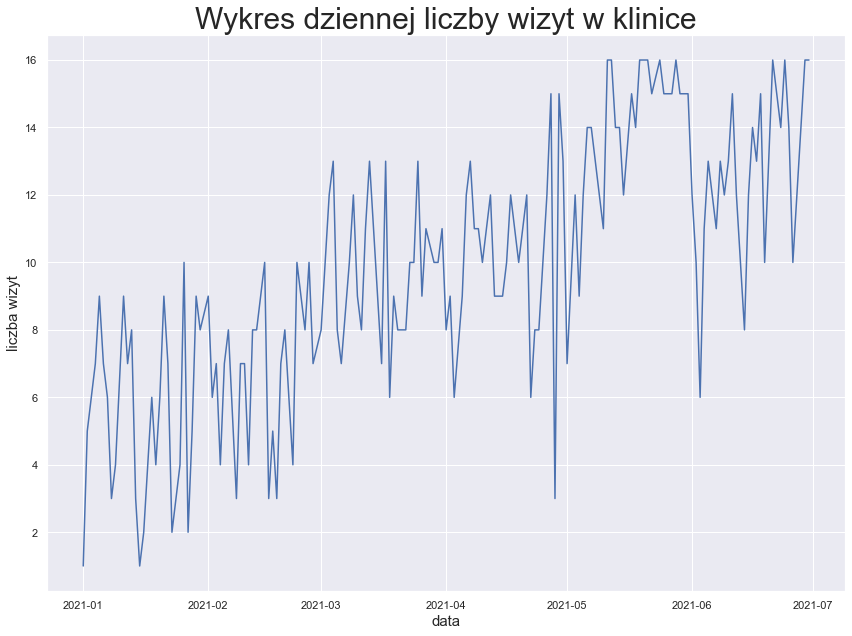

In [5]:
plt.figure(figsize=(12,9))
plt.plot(daty,wizyty)
plt.grid(True)
plt.title('Wykres dziennej liczby wizyt w klinice',size = 30)
plt.xlabel('data',size=15)
plt.ylabel('liczba wizyt',size=15)
plt.tight_layout()

Klinika funkcjonuje od stycznia 2021 roku. Pacjenci przyjmowani są od poniedziałku do soboty. Wykres przedstawia kolejne dni pracy kliniki z wyłączeniem niedziel i świąt, kiedy klinika nie funkcjonowała. Na osi poziomej znajdują się daty od momentu otworzenia kliniki do chwili obecnej, a na pionowej liczba pacjentów przyjętych danego dnia. Widać na wykresie dodatni trend liniowy. Im dłużej działa klinika tym więcej pacjentów jest zainteresowanych z korzystnia z jej usług.

## 2.  Miesięczny rozkład wizyt.

In [14]:
query = "SELECT month(data_wizyty) AS miesiąc_wizyty,count(*) as liczba_wizyt FROM `team12`.`wizyty` GROUP BY YEAR(data_wizyty), miesiąc_wizyty LIMIT 1000;"
mycursor.execute(query)

In [15]:
myresult = mycursor.fetchall()
miesiące = []
wizyty = []
for x in myresult:
    miesiące.append(x[0])
    wizyty.append(x[1])

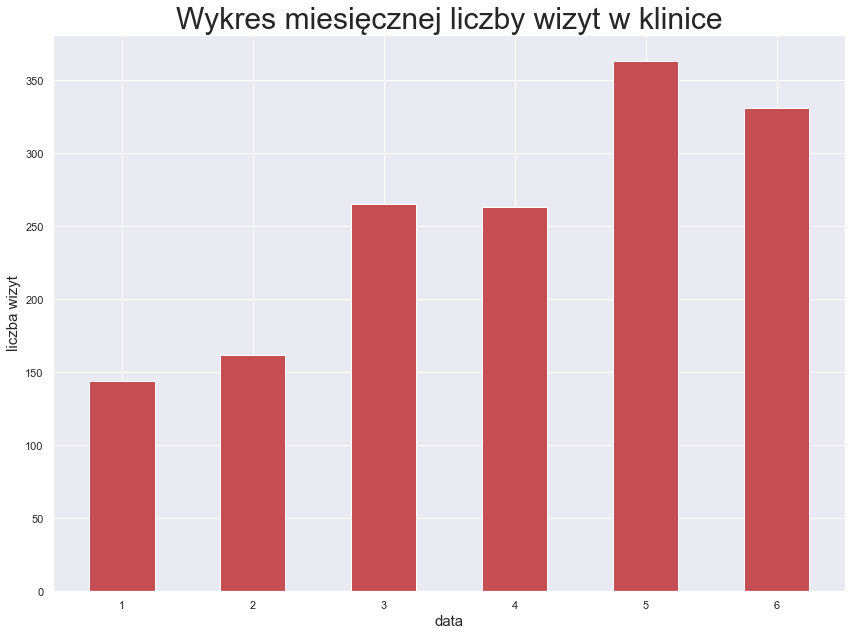

In [49]:
plt.figure(figsize=(12,9))
plt.bar(miesiące,wizyty,width=0.5, color='r', align='center')
plt.grid(True)
plt.title('Wykres miesięcznej liczby wizyt w klinice',size = 30)
plt.xlabel('data',size=15)
plt.ylabel('liczba wizyt',size=15)
plt.tight_layout()

Powyższy wykres to histogtam przedstawiający rozkład wizyt w kolejnych miesjącach. Na osi poziomej znajdują się kolejne miesjące otwarcia kliniki oznaczone liczbami. Oś pozioma przedstawia liczbę przyjętych pacjentów w danym miesiącu. Tak jak w poprzednim przypadu widać, że słupki rosną wraz z wydłużaniem się czasu otwarcia kliniki.

##3. Bilans zysków i strat kliniki.

In [20]:
query = "SELECT miesiąc, sum(t.całkowity_zysk) AS zyski_z_wizyt FROM (SELECT id_czynnosci,MONTH(data_wizyty) AS miesiąc, count(*) as liczba_wykonanych_zabiegów, cena*count(*) as całkowity_zysk FROM `team12`.`wizyty` LEFT OUTER JOIN `team12`.`czynnosci` USING(id_czynnosci) GROUP BY year(data_wizyty),month(data_wizyty),id_czynnosci LIMIT 1000) AS t GROUP BY miesiąc LIMIT 1000;"
mycursor.execute(query)

In [21]:
myresult = mycursor.fetchall()
zyski = []
for x in myresult:
    zyski.append(x[1])

In [22]:
query = "SELECT miesiąc,SUM(t.wydatki) as suma_wydatków FROM((SELECT MONTH(od)AS miesiąc, sum(wyplata+premia) AS wydatki FROM `team12`.`zarobki` GROUP BY YEAR(od), MONTH(od) LIMIT 1000) UNION (SELECT MONTH(data_zakupu) AS miesiąc, sum(cena) AS wydatki FROM `team12`.`asortyment` GROUP BY MONTH(data_zakupu) LIMIT 1000)) AS t GROUP BY miesiąc LIMIT 1000; "
mycursor.execute(query)

In [23]:
myresult = mycursor.fetchall()
straty = []
for x in myresult:
    straty.append(x[1])

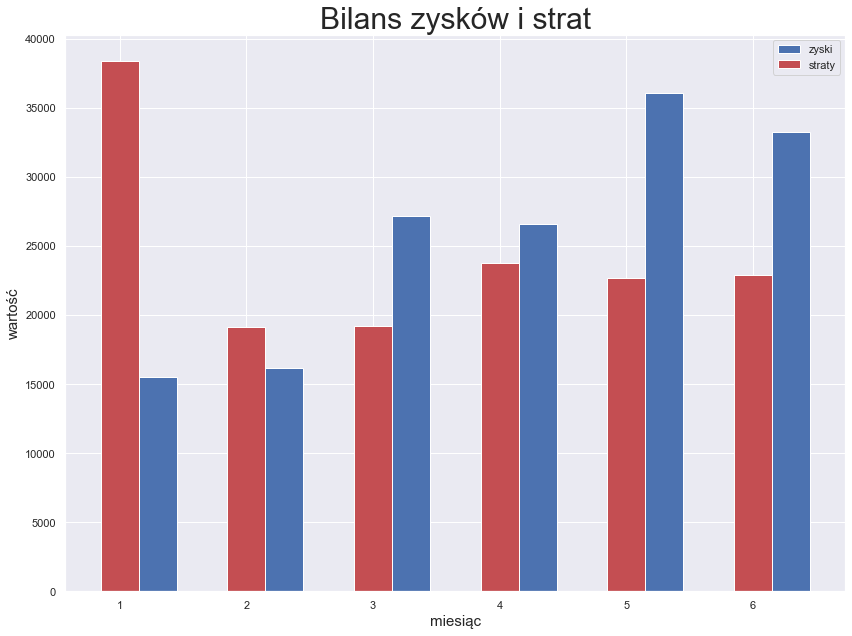

In [24]:
w = 0.3
miesiące = np.arange(1,len(zyski)+1,1)
plt.figure(figsize=(12,9))
plt.bar(miesiące+w,zyski,width=w, color='b', align='center',label = 'zyski')
plt.bar(miesiące,straty,width=w, color='r', align='center',label = 'straty')
plt.grid(True)
plt.title('Bilans zysków i strat',size = 30)
plt.xlabel('miesiąc',size = 15)
plt.ylabel('wartość',size = 15)
plt.legend()
plt.tight_layout()

Wykres przedstawia bilans zysków i strat kliniki weterynaryjnej. Kolorem niebieskim oznaczono zyski czyli wpływy za wykonane w klinice zabiegi, czerwonym zaś straty czyli wszystkie wydatki kliniki w danym miesiącu. Oś pozioma przedstawia kolejne miesiące działalności kliniki natomiast pionowa wartości zysków i strat. Widać, że w pierwszym miesiącu, ze względu na otwarcie kliniki odnotowano największe straty ponieważ zainwestowano sporą sumę pieniędzy w otwarcie lokalu. Zyski były stosunkowo niskie ponieważ klinika rozpoczynała działalność i nie była jeszcze dobrze znana. W drugim miesiacu działalności kliniki różnica zysków i strat nie jest już tak znacząca, jednak dalej straty przewyższają wpływy. Od trzeciego miesiąca działalności kliniki do chwili obecnej zyski przewyższają straty co świadczy o tym, że klinika w końcu zaczyna zarabiać.

## 4. Skumulowane zyski i straty.

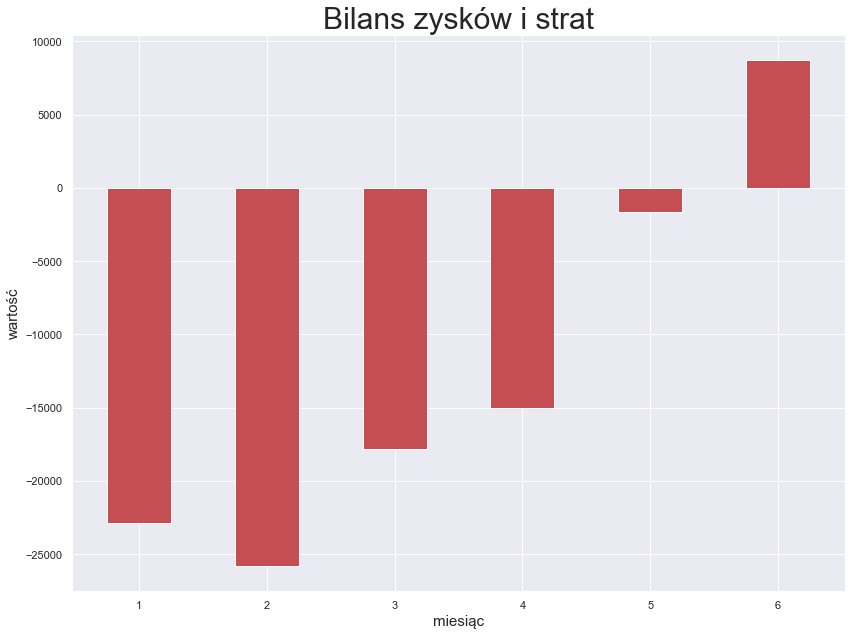

In [48]:
bilans = []
cum_zyski = np.cumsum(zyski)
cum_straty = np.cumsum(straty)
for i in range(len(zyski)):
    bilans.append(cum_zyski[i]-cum_straty[i])
    
plt.figure(figsize=(12,9))
plt.bar(miesiące,bilans, width=0.5, color='r', align='center')
plt.grid(True)
plt.title('Bilans zysków i strat',size = 30)
plt.xlabel('miesiąc',size = 15)
plt.ylabel('wartość',size = 15)
plt.tight_layout()

W celu sprawdzenia czy klinika faktycznie zaczęła zarabiać sporządzono wykres skumulowanych zysków i strat. Analogicznie jak w poprzednich przypadkach oś pozioma oznacza kolejne miesiące otwarcia kliniki natomiast pionowa wartości skumulowanych sum zysków i strat. Na wykresie widać, że w drugim miesiącu bilans zysków i strat wyglądał najmniej obiecująco. Jednak z każdym kolejnym miesiącem skumulowana wartość zysków i strat rosła. W ostatnim opisanym miesiącu działalności kliniki faktycznie zaczęła ona przynosić zyski a zainwestowane pieniądze zwróciły się.

## 5. Zwierzęra najdłużej czekające na wizytę.

In [26]:
query = "SELECT id_zwierzecia,zwierze,imie, (UNIX_TIMESTAMP(data_wizyty) - UNIX_TIMESTAMP(data_rejestracji))/3600 AS czas_oczekiwania FROM `team12`.`zwierzeta` LEFT OUTER JOIN `team12`.`wizyty` USING(id_zwierzecia) ORDER BY czas_oczekiwania DESC LIMIT 10;"
mycursor.execute(query)

In [27]:
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns = ['id_zwierzęcia', 'zwierzę','imię','czas[h]'])

In [28]:
df.style

,id_zwierzęcia,zwierzę,imię,czas[h]
0,495,Pies,Niko,47.3333
1,199,Pies,Maggie,47.3333
2,697,Kot,Mambo,47.1667
3,613,Pies,Zefir,46.9333
4,126,Pies,Filip,46.8667
5,24,Pies,Izaak,46.7833
6,530,Kot,Zebra,46.7000
7,399,Pies,Lulu,46.7000
8,419,Pies,Leo,46.4333
9,223,Pies,Margot,46.3500


Tabela przedtsawia listę zwierząt najdłużej oczekujących na wizytę. Jest to czas mierzony od momentu ustalenia wizyty do jej faktycznego terminu. Klinika działa bardzo sprawnie i czas oczekiwania na przyjęcie nie przekracza dwóch dni.

## 6. Podsumowanie najczęściej wykonywanych zabiegów.

In [33]:
query = "SELECT czynnosc,count(*) as liczba_wykonanych_zabiegów FROM `team12`.`wizyty` LEFT OUTER JOIN `team12`.`czynnosci` USING(id_czynnosci) GROUP BY id_czynnosci ORDER BY liczba_wykonanych_zabiegów DESC LIMIT 50;"
mycursor.execute(query)

In [34]:
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns = ['Zabieg', 'Liczba'])
df.style

,Zabieg,Liczba
0,Badanie kału na obecność pasożytów,52
1,Wydanie paszportu dla zwierzęcia,49
2,Odrobaczanie,49
3,Badanie biochemiczne krwi,48
4,EKG,48
5,Określenie grupy krwi,48
6,Wizyta w gabinecie,47
7,Inseminacja,47
8,Konsultacja weterynaryjna,47
9,Usuwanie kamienia nazębnego,47


W celu oceny zainteresowania usługami oferowanymi przez klinikę sporządzono tabelę zawierającą liczbę wykonanych zabiegów przez cały czas otwarcia kliniki. Najczęściej wykonwano badanie kału na obecność pasożytów, najrzadziej wykonywanym zabiegiem było natomiast zwalczanie pcheł. Różnica w liczbie wykonanych zabiegów pomiędzy najczęściej wykonywanym a tym najrzadziej wykonywanym jest jednak niewielka bo wynosi 22 zabiegi, nie ma więc podstaw do usuwania jakiegokolwiek z zabiegów z listy oferowanych usług. 

## 7. Podsumiwanie zabiegów przynoszących największe dochody.

In [52]:
query = "SELECT czynnosc,count(*) as liczba_wykonanych_zabiegów, cena*count(*) as całkowity_zysk FROM `team12`.`wizyty` LEFT OUTER JOIN `team12`.`czynnosci` USING(id_czynnosci) GROUP BY id_czynnosci ORDER BY całkowity_zysk DESC LIMIT 50;"
mycursor.execute(query)

In [53]:
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns = ['Zabieg','l.zabiegów', 'Zysk'])
df.style

,Zabieg,l.zabiegów,Zysk
0,Leczenie złamań,34,15300.000000
1,Sterylizacja,37,14800.000000
2,Drobny zabieg chirurgiczny,46,9200.000000
3,Czyszczenie uzębienia,44,8800.000000
4,Testy alergiczne,44,8800.000000
5,Drobny zabieg w znieczuleniu,42,7350.000000
6,Eutanazja,41,6150.000000
7,Określenie grupy krwi,48,5760.000000
8,Konsultacja behawiorysty,31,5580.000000
9,Strzyżenie,34,5100.000000


Oprócz częstości wykonywanych zabiegów istotne jest również sprawdzenie, które zabiegi przyniosły największe zyski dla kliniki. Największe korzyści finansowe dla kliniki przyniosło leczenie złamań i zabieg sterylizacji. Najmniej dochodowym zabiegem okazało się obcinanie pazurów i zwalczanie pcheł.

## 8. Podsumowanie zwierząt najczęściej korzystających z usług kliniki.

In [35]:
query = "SELECT id_zwierzecia, zwierze, imie, count(*) as liczba_wykonanych_zabiegów FROM `team12`.`zwierzeta` LEFT OUTER JOIN `team12`.`wizyty` USING(id_zwierzecia) GROUP BY id_zwierzecia ORDER BY liczba_wykonanych_zabiegów DESC LIMIT 10;"
mycursor.execute(query)
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns = ['Id_zwierzęcia','Zwierzę', 'Imię','l.zabiegów'])
df.style

,Id_zwierzęcia,Zwierzę,Imię,l.zabiegów
0,8,Kot,Tami,9
1,527,Pies,Wigor,8
2,221,Pies,Muffinka,7
3,615,Pies,Ciapek,7
4,158,Pies,Nuka,7
5,360,Mysz,Gustaw,7
6,175,Pies,Falafel,7
7,15,Pies,Shadow,7
8,203,Pies,Stefa,6
9,321,Kot,Hektor,6


 Dla zwierząt najczęściej korzystających z usług kliniki mogłyby być skierowane pewne promocje na zabiegi. W związku z tym sporządzono tabelę przedstawiającą 10 zwierząt najczęściej korzystających z usług kliniki oraz liczbę tych zabiegów. Zdecydowanym rekordzistą okazała się kotka Tami.

## 9. Właściciele posiadający najwięcej zarejestrowanych zwierząt.

In [40]:
query = "SELECT wlasciciele.imie,wlasciciele.nazwisko,count(*) AS liczba_zwierząt FROM `team12`.`wlasciciele` LEFT OUTER JOIN `team12`.`zwierzeta` ON  wlasciciele.id_wlasciciela = zwierzeta.id_wlasciciela GROUP BY wlasciciele.id_wlasciciela ORDER BY liczba_zwierząt DESC LIMIT 10;"
mycursor.execute(query)
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns = ['Imię','Nazwisko', 'l.zwierząt'])
df.style

,Imię,Nazwisko,l.zwierząt
0,KAROL,TELEJ,5
1,KATARZYNA,BIESIADZIŃSKA,5
2,ZUZANNA,NOWAK,4
3,MIA,PIOTROWSKA,4
4,HELENA,SKALMOWSKA,4
5,ANTONINA,BŁOTNICKA,4
6,ALEKSANDRA,BACHTOWICZ,4
7,HANNA,KOWALIK,4
8,MAKSYMILIAN,GRUSZKA,4
9,ANTONI,FILIPCZYK,4


Podobnie jak w poprzednim przypadku właściciele leczący w klinice największą liczbę zwierząt mogą liczyć na specjalną ofertę ze strony kliniki. Aby ich zidentyfikować stworzono więc tabelę zawierającą właścicieli i liczbę zarejestrowanych w klinice zwierząt. W tym przypadku najwięcej zwierzaków posiada Pan Karol Telej i Pani Katarzyna Biesiadzińska.

## 10. Rozkład pacjentów pod względem gatunku.

In [41]:
query = "SELECT zwierze, count(*) as liczba_zwierząt FROM `team12`.`zwierzeta` GROUP BY zwierze ORDER BY liczba_zwierząt DESC LIMIT 1000;"
mycursor.execute(query)

In [42]:
myresult = mycursor.fetchall()
zwierzeta = []
ilosc = []
for x in myresult:
    zwierzeta.append(x[0])
    ilosc.append(x[1])

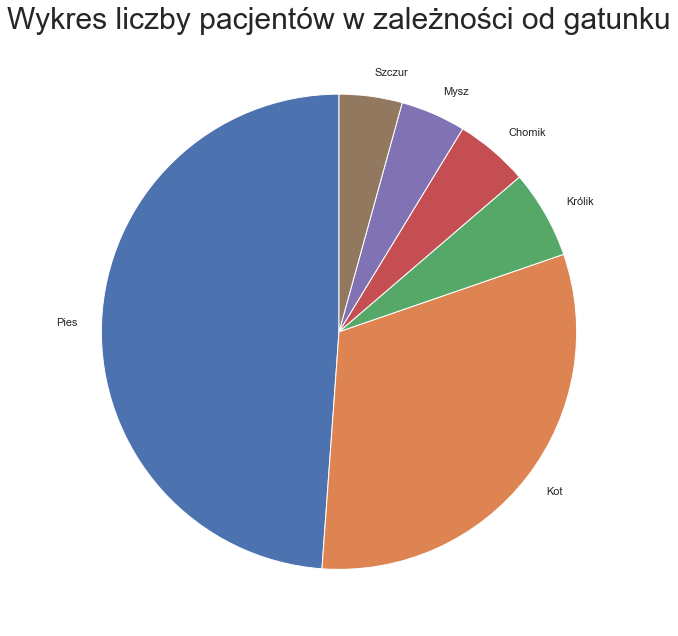

In [43]:
plt.figure(figsize=(12,9))
plt.pie(ilosc,labels = zwierzeta,startangle = 90)
plt.title('Wykres liczby pacjentów w zależności od gatunku',size=30)
plt.tight_layout()

W celu dostosowania usług kliniki do pacjentów najczęściej z nich korzystających sporządzono wykres przedtswiający rozkład pacjentów pod względem gatunków. Klinikę najczęściej odwiedzają psy i koty. Reszta pacjentów stanowi mniej niż 25% wszystkich pacjentów. W związku z czym usługi oferowane w klinice powinny być bardziej nastawione na te, z których mogą skorzystać psy i koty. Może to wspomóc osiągnięcie jeszcze większych zysków przez klinikę.

In [96]:
sql_engine.close()

## Podsumowanie analizy działalności kliniki

Patrząc na przeprowadzoną wyżej analizę można wywnioskować, że klinika rozwija się prawidłowo. Z miesiąca na miesiąc coraz więcej pacjentów korzysta z jej usług, a co za tym idzie klinika osiąga coraz większe zyski. W ostatnim miesiącu działalności kliniki zanotowano dodatni bilans zysków i strat, a więc widać, że działalność kliniki nie tylko zwróciła zainwestowane środki ale także zaczęła przynosić faktyczne zyski. Zauważono też, ze najlepiej nastawić działalność kliniki na zwierzęta, których gatunek to pies albo kot, ponieważ stanowią oni ponad 75% wszystkich klientów. Warto zostawić w ofercie wszystkie oferowane do tej pory usługi ponieważ na wszystkie znalazło się całkiem spore zainteresowanie. Zdecydowanie największe zyski przyniosło leczenie złamań i wykonywanie sterylizacji. Podczas analizy zidentyfikowano także zwierzęta jak i właścicieli najczęściej korzystających z usług kliniki dla których można zastosować specjalną ofertę promocyjną, co może przyczynić się do wzrostu zainteresowania kliniką przez innych, nowych, potencjalnych klientów.